# Test

In [1]:
# the TestEnv environment is used to simply simulate the network
from flow.envs import TestEnv

# the Experiment class is used for running simulations
from flow.core.experiment import Experiment

# all other imports are standard
from flow.core.params import VehicleParams
from flow.core.params import NetParams
from flow.core.params import InitialConfig
from flow.core.params import EnvParams
from flow.core.params import SumoParams

from flow.scenarios import Scenario

import re

In [2]:
from flow.controllers.car_following_models import IDMController
from flow.controllers.routing_controllers import MinicityRouter

In [3]:
from flow.core.params import InFlows


In [4]:
from flow.controllers.base_routing_controller import BaseRouter
import random
import re
import numpy as np

In [5]:
from flow.envs import Env

In [6]:
from osm_router import OSMRouter
from osm_scenario import OSMScenario

In [7]:
name = 'Kenmore'

In [8]:
def edge_distribution(filename):
    edges = []
    for line in open(filename):
        m = re.search(r'edge:(.+)', line)
        if m is not None:
            edges.append(m.group(1))
    return edges

In [9]:
edge_distribution(name + "Selection.txt")

['-240745552',
 '-240745678#0',
 '-240745678#1',
 '-43100851',
 '-8649816#9',
 '-8650367',
 '-8652041#0',
 '-8652041#1',
 '105961640',
 '105961646',
 '240745551',
 '240745552',
 '240745553',
 '240745675',
 '240745676',
 '240745677#0',
 '240745677#1',
 '240745677#2',
 '240745677#3',
 '240745678#0',
 '240745678#1',
 '241028354',
 '325811605',
 '325811606#0',
 '325811606#1',
 '426830724',
 '43100846#0',
 '43100846#1',
 '43100847#0',
 '43100848',
 '43100849',
 '43100851',
 '485271437#0',
 '485271438#0',
 '485271438#1',
 '519869879#1',
 '519869879#2',
 '519869879#3',
 '543965405#3',
 '591236197',
 '591236207',
 '591236214#0',
 '591236214#1',
 '591236214#2',
 '8637705',
 '8644117',
 '8646307',
 '86479790#2',
 '86479790#3',
 '8649816#9',
 '8650084',
 '8650367',
 '8651363',
 '8651404#0',
 '8651404#1',
 '8651404#2',
 '8652041#0',
 '8652041#1']

In [10]:
# my custom environment
import osm_traffic_env
from osm_traffic_env import OSMTrafficEnvironment
from osm_traffic_env import OSMTrafficTestEnvironment


In [11]:
inflow = InFlows()
inflow.add(
    veh_type="human",
    edge='241028354',
    vehs_per_hour=1000,
    departSpeed=10,
    departLane="random",
    departPos="last")
inflow.add(
    veh_type="human",
    edge='-240745552',
    vehs_per_hour=700,
    departSpeed=10,
    departLane="random",
    departPos="last")
inflow.add(
    veh_type="human",
    edge='519869879#1',
    vehs_per_hour=700,
    departSpeed=10,
    departLane="random",
    departPos="last")
inflow.add(
    veh_type="human",
    edge='86479790#2',
    vehs_per_hour=500,
    departSpeed=10,
    departLane="random",
    departPos="last")
inflow.add(
    veh_type="human",
    edge='8649389#1',
    vehs_per_hour=200,
    departSpeed=10,
    departLane="random",
    departPos="last")
inflow.add(
    veh_type="human",
    edge='8649816#9',
    vehs_per_hour=200,
    departSpeed=10,
    departLane="random",
    departPos="last")

In [12]:
initial_config = InitialConfig(
    spacing="random", 
    perturbation=1,
#     edges_distribution=edge_distribution(name + 'Selection.txt')
)

In [13]:
net_params = NetParams(
    inflows=inflow,
    osm_path=name+'.osm',
    no_internal_links=False
)

In [14]:
# create the remainding parameters
env_params = EnvParams()
env_params.additional_params = osm_traffic_env.ADDITIONAL_ENV_PARAMS
sim_params = SumoParams(render=True, restart_instance=True)
# initial_config = InitialConfig()
vehicles = VehicleParams()
vehicles.add('human',
             num_vehicles=100, 
             acceleration_controller=(IDMController, {}),
             routing_controller=(OSMRouter, {}))

# create the scenario
scenario = OSMScenario(
    name=name,
    net_params=net_params,
    initial_config=initial_config,
    vehicles=vehicles
)

In [16]:
results = []

In [20]:
for i in range(10):
    # create the environment
    env = OSMTrafficTestEnvironment(
        env_params=env_params,
        sim_params=sim_params,
        scenario=scenario
    )

    # run the simulation for 1000 steps
    exp = Experiment(env=env)
    r = exp.run(1, 10000)
    results.append(r)

Round 0, return: 0
Average, std return: 0.0, 0.0
Average, std speed: 1.0691592972952313, 0.0
Round 0, return: 0
Average, std return: 0.0, 0.0
Average, std speed: 0.8844487119636544, 0.0
Round 0, return: 0
Average, std return: 0.0, 0.0
Average, std speed: 0.2502520217974394, 0.0
Round 0, return: 0
Average, std return: 0.0, 0.0
Average, std speed: 0.8009161034437958, 0.0


# Analysis

In [21]:
len(results)

10

In [24]:
results[0].keys()

dict_keys(['returns', 'mean_returns', 'velocities', 'per_step_returns'])

In [25]:
v = [x['velocities'] for x in results]
v

[[array([0.09697948, 0.19394951, 0.29091381, ..., 0.        , 0.        ,
         0.        ])],
 [array([0.09870847, 0.19738677, 0.29603767, ..., 0.        , 0.        ,
         0.        ])],
 [array([0.0979135 , 0.19581305, 0.2937012 , ..., 0.        , 0.        ,
         0.        ])],
 [array([0.09868761, 0.19731807, 0.29592031, ..., 0.        , 0.        ,
         0.        ])],
 [array([0.09846971, 0.19685944, 0.29520126, ..., 0.        , 0.        ,
         0.        ])],
 [array([0.09879955, 0.19757657, 0.29633228, ..., 0.        , 0.        ,
         0.        ])],
 [array([0.09791205, 0.19580944, 0.2936954 , ..., 0.        , 0.        ,
         0.        ])],
 [array([0.09841814, 0.19678793, 0.29505876, ..., 0.        , 0.        ,
         0.        ])],
 [array([0.09878216, 0.19753526, 0.29626535, ..., 0.        , 0.        ,
         0.        ])],
 [array([0.09701597, 0.19400317, 0.29097305, ..., 0.        , 0.        ,
         0.        ])]]

In [26]:
means = []
for i in v:
    m = np.mean(i)
    means.append(m)

In [27]:
means

[0.45883545831320116,
 1.1666769918029374,
 0.2701375349785804,
 0.7898747761779489,
 0.0975448673564685,
 0.07254009830456011,
 1.0691592972952313,
 0.8844487119636544,
 0.2502520217974394,
 0.8009161034437958]

In [28]:
np.mean(means)

0.5860385861433818

In [29]:
np.std(means)

0.38449320665401776

In [30]:
import matplotlib.pyplot as plt

(array([2., 2., 0., 1., 0., 0., 2., 1., 0., 2.]),
 array([0.0725401 , 0.18195379, 0.29136748, 0.40078117, 0.51019486,
        0.61960855, 0.72902223, 0.83843592, 0.94784961, 1.0572633 ,
        1.16667699]),
 <a list of 10 Patch objects>)

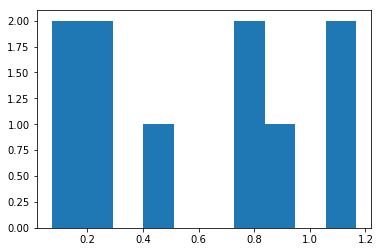

In [33]:
plt.hist(means)